In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import IntegerType, StringType, FloatType, DateType, TimestampType
import pyspark.sql.functions as F

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("trailrun") \
            .getOrCreate()
            
sc = spark.sparkContext   # for the pre-2.0 sparkContext

In [5]:
run dataprep.py

In [8]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16978 entries, 0 to 16988
Data columns (total 26 columns):
PersonID             16978 non-null float64
EventID              16978 non-null int64
Gender               16978 non-null object
Distance             16978 non-null object
Total fee            16978 non-null float64
Payment method       13482 non-null object
Street Address       14062 non-null object
City                 15232 non-null object
State/Province       16087 non-null object
Zip Code             14978 non-null object
Country              15796 non-null object
Contact              16978 non-null object
Tshirt               16978 non-null object
Hoodie               16978 non-null object
Event_Date           16978 non-null datetime64[ns]
MergeoEvent          16978 non-null bool
EventTypeID          16978 non-null int64
EventType            16978 non-null object
SeriesID             16978 non-null object
Age2                 16978 non-null float64
Miles2               169

In [47]:
participations = cleaned_df[['PersonID', 'EventID', 'Event_Date']].copy()

In [48]:
participations.count()

PersonID      16978
EventID       16978
Event_Date    16978
dtype: int64

In [49]:
participated_list = np.full((16978, 1), 1)

participations.insert(2, 'Participated', participated_list)

In [50]:
participations.head()

,PersonID,EventID,Participated,Event_Date
0,1.0,11,1,2015-02-15
1,2.0,9,1,2015-01-24
2,2.0,17,1,2015-06-09
3,3.0,30,1,2015-11-07
4,4.0,18,1,2015-06-20


In [51]:
unique_personIDs = participations['PersonID'].unique()
unique_eventIDs = participations['EventID'].unique()

In [52]:
print ('Total Number of Users: {}'.format(len(unique_personIDs)))
print ('Total Number of Events: {}'.format(len(unique_eventIDs)))
print ('Total Number of Participations {}'.format(len(participations)))

Total Number of Users: 10764
Total Number of Events: 86
Total Number of Participations 16978


In [53]:
spark_df = spark.createDataFrame(participations)

In [55]:
spark_df.show(5)
spark_df.printSchema()

+--------+-------+------------+-------------------+
|PersonID|EventID|Participated|         Event_Date|
+--------+-------+------------+-------------------+
|     1.0|     11|           1|1423958400000000000|
|     2.0|      9|           1|1422057600000000000|
|     2.0|     17|           1|1433808000000000000|
|     3.0|     30|           1|1446854400000000000|
|     4.0|     18|           1|1434758400000000000|
+--------+-------+------------+-------------------+
only showing top 5 rows

root
 |-- PersonID: double (nullable = true)
 |-- EventID: long (nullable = true)
 |-- Participated: long (nullable = true)
 |-- Event_Date: long (nullable = true)



In [68]:
participation_count = spark_df.groupBy("EventID").count().rdd.values().histogram(86)

In [69]:
participation_count[0].pop(0)

print(len(participation_count[0]))
print(len(participation_count[1]))

86
86


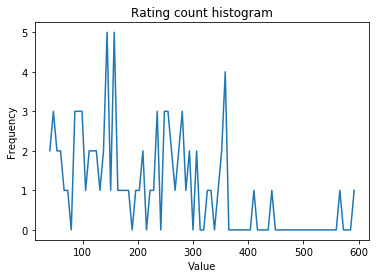

In [70]:
plt.plot(participation_count[0], participation_count[1])
plt.title("Rating count histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()